In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("car.data")
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
#to check the duplicated in our datasets
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [13]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [14]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x,y

(      buying  maint  doors  persons  lug_boot  safety
 0        3.0    3.0    0.0      0.0       2.0     1.0
 1        3.0    3.0    0.0      0.0       2.0     2.0
 2        3.0    3.0    0.0      0.0       2.0     0.0
 3        3.0    3.0    0.0      0.0       1.0     1.0
 4        3.0    3.0    0.0      0.0       1.0     2.0
 ...      ...    ...    ...      ...       ...     ...
 1723     1.0    1.0    3.0      2.0       1.0     2.0
 1724     1.0    1.0    3.0      2.0       1.0     0.0
 1725     1.0    1.0    3.0      2.0       0.0     1.0
 1726     1.0    1.0    3.0      2.0       0.0     2.0
 1727     1.0    1.0    3.0      2.0       0.0     0.0
 
 [1728 rows x 6 columns],
 0       2.0
 1       2.0
 2       2.0
 3       2.0
 4       2.0
        ... 
 1723    1.0
 1724    3.0
 1725    2.0
 1726    1.0
 1727    3.0
 Name: class, Length: 1728, dtype: float64)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain,ytrain)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
from sklearn.metrics import accuracy_score
prediction = model.predict(xtest)
print("prediction is",prediction)
accuracy = accuracy_score(prediction,ytest)
print("the accuracy is ",accuracy)

prediction is [2. 2. 2. 2. 2. 3. 2. 0. 0. 0. 2. 2. 0. 2. 2. 0. 2. 2. 0. 2. 0. 0. 1. 2.
 2. 2. 2. 2. 2. 2. 3. 0. 2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0.
 0. 0. 0. 1. 2. 0. 0. 2. 0. 0. 0. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 3.
 2. 0. 0. 2. 2. 2. 0. 2. 3. 0. 2. 0. 2. 2. 2. 2. 2. 1. 2. 1. 0. 2. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 0. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 2. 0. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 0. 0. 2. 0. 2. 1. 2. 2. 2. 2. 0.
 2. 2. 2. 0. 2. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 2. 2. 0. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 1. 0. 3. 0. 0. 2. 2. 2. 0. 2. 2. 0.
 2. 2. 3. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 3.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 0. 1. 1. 2. 1. 2. 0. 2. 1. 0.
 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 

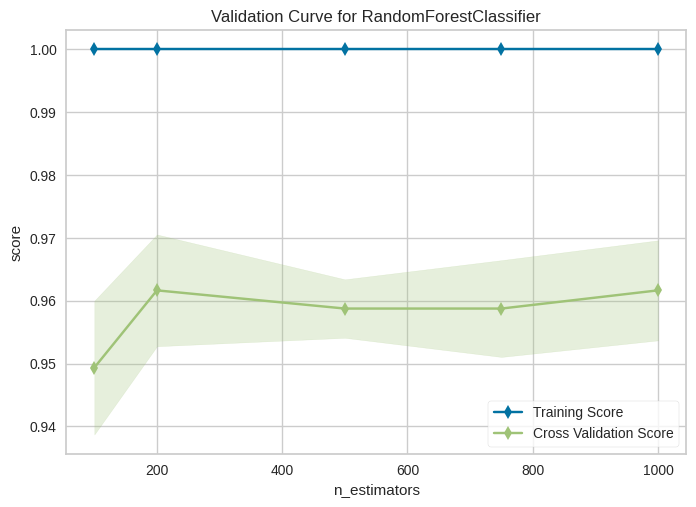

,estimator,RandomForestClassifier()
,param_name,'n_estimators'
,param_range,"array([ 100, ..., 750, 1000])"
,ax,<Axes: title=...label='score'>
,logx,False
,groups,None
,cv,3
,scoring,'accuracy'
,n_jobs,1
,pre_dispatch,'all'
,markers,'-d'


In [22]:
from yellowbrick.model_selection import validation_curve
estimator = [100,200,500,750,1000]
validation_curve(RandomForestClassifier(),X=xtrain,y=ytrain,param_name='n_estimators',param_range=estimator,scoring='accuracy',cv=3)

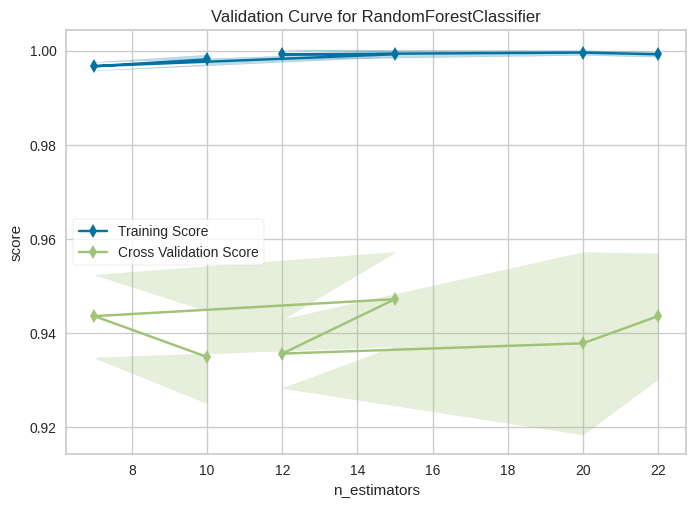

,estimator,RandomForestClassifier()
,param_name,'n_estimators'
,param_range,"array([10, 7..., 12, 20, 22])"
,ax,<Axes: title=...label='score'>
,logx,False
,groups,None
,cv,3
,scoring,'accuracy'
,n_jobs,1
,pre_dispatch,'all'
,markers,'-d'


In [25]:
#now we find the depth based on graph
dept = [10,7,15,12,20,22]
validation_curve(RandomForestClassifier(),X=xtrain,y=ytrain,param_name='n_estimators',param_range=dept,scoring='accuracy',cv=3)
#you see in the graph..15 will be the crt dept value present in it!

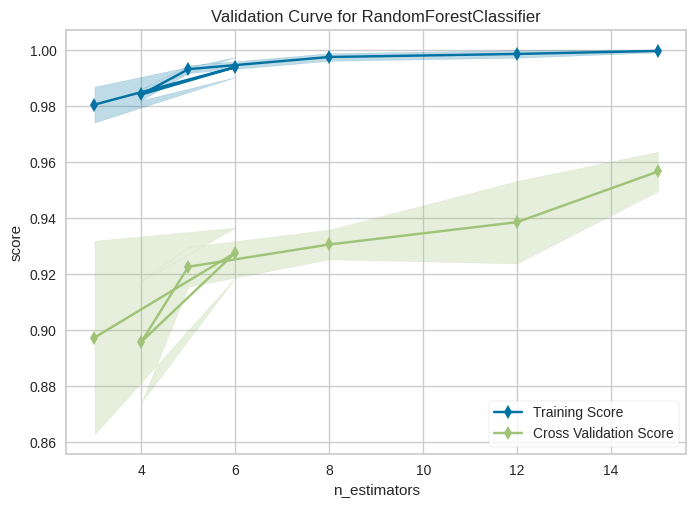

,estimator,RandomForestClassifier()
,param_name,'n_estimators'
,param_range,"array([ 3, 6..., 8, 12, 15])"
,ax,<Axes: title=...label='score'>
,logx,False
,groups,None
,cv,3
,scoring,'accuracy'
,n_jobs,1
,pre_dispatch,'all'
,markers,'-d'


In [28]:
#minimum sample split data
minsample_split = [3,6,4,5,8,12,15]
validation_curve(RandomForestClassifier(),X=xtrain,y=ytrain,param_name='n_estimators',param_range=minsample_split,scoring='accuracy',cv=3)

In [29]:
#now we get the three param we need for ur model like estimators,dept value,minsplit
model2 = RandomForestClassifier(n_estimators=1000,max_depth=15,min_samples_split=15,random_state=0)
model2.fit(xtrain,ytrain)
prediction2 = model2.predict(xtest)
print(prediction)
accuracy2 = accuracy_score(prediction2,ytest)
print(accuracy2)

[2. 2. 2. 2. 2. 3. 2. 0. 0. 0. 2. 2. 0. 2. 2. 0. 2. 2. 0. 2. 0. 0. 1. 2.
 2. 2. 2. 2. 2. 2. 3. 0. 2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0.
 0. 0. 0. 1. 2. 0. 0. 2. 0. 0. 0. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 3.
 2. 0. 0. 2. 2. 2. 0. 2. 3. 0. 2. 0. 2. 2. 2. 2. 2. 1. 2. 1. 0. 2. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 0. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 2. 0. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 0. 0. 2. 0. 2. 1. 2. 2. 2. 2. 0.
 2. 2. 2. 0. 2. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 2. 2. 0. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 1. 0. 3. 0. 0. 2. 2. 2. 0. 2. 2. 0.
 2. 2. 3. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 3.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 0. 1. 1. 2. 1. 2. 0. 2. 1. 0.
 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 0. 0. 2. 2. 2.

In [30]:
feature_scores = pd.Series(model2.feature_importances_,index=xtrain.columns).sort_values(ascending=False)
feature_scores

safety      0.348887
persons     0.294090
buying      0.140486
maint       0.112886
lug_boot    0.070628
doors       0.033022
dtype: float64

<Axes: xlabel='None', ylabel='None'>

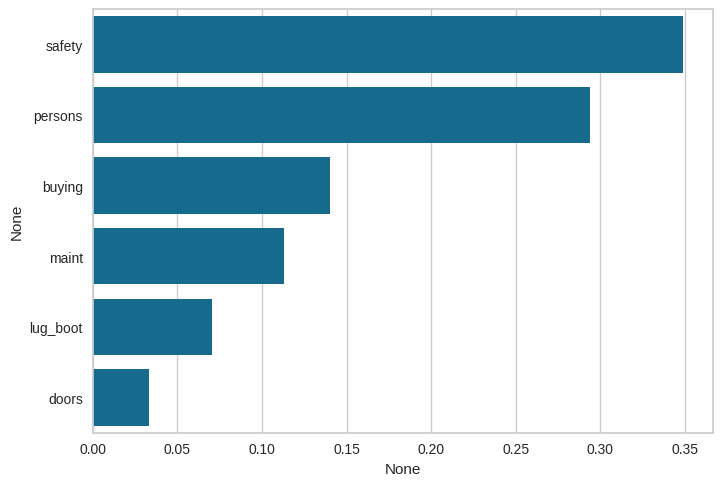

In [31]:
sns.barplot(x=feature_scores,y=feature_scores.index)


In [33]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [38]:
#lets drop some column ans see the accuracy
x1 = df.drop(['maint','doors','lug_boot','class'],axis=1)
y1 = df['class']
x1,y1

(      buying  persons  safety
 0        3.0      0.0     1.0
 1        3.0      0.0     2.0
 2        3.0      0.0     0.0
 3        3.0      0.0     1.0
 4        3.0      0.0     2.0
 ...      ...      ...     ...
 1723     1.0      2.0     2.0
 1724     1.0      2.0     0.0
 1725     1.0      2.0     1.0
 1726     1.0      2.0     2.0
 1727     1.0      2.0     0.0
 
 [1728 rows x 3 columns],
 0       2.0
 1       2.0
 2       2.0
 3       2.0
 4       2.0
        ... 
 1723    1.0
 1724    3.0
 1725    2.0
 1726    1.0
 1727    3.0
 Name: class, Length: 1728, dtype: float64)

In [39]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x1,y1,test_size=0.3)
model3 = RandomForestClassifier()
model3.fit(xtrain1,ytrain1)
pred = model3.predict(xtest1)
acc1 = accuracy_score(pred,ytest1)
print("accuracy is ",acc1)
print("prediction is ",pred)

accuracy is  0.8400770712909441
prediction is  [2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2. 3. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 3. 2. 0. 2. 2. 0. 2. 0. 0. 0. 0. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 0.
 3. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2.
 0. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 3. 0. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 3. 2. 0. 0. 0. 2. 3.
 2. 2. 0. 2. 2. 2. 2. 2. 0. 3. 2. 0. 2. 2. 3. 2. 2. 2. 2. 0. 2. 0. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 0. 0. 2. 2. 0. 2. 2. 0. 2. 2. 2. 0. 3. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 0. 2. 0. 2. 2. 3. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 3. 2. 3.
 3. 0. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 2. 2. 0. 0. 2. 2. 3. 2. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2. 3. 0. 2. 0. 2.
 2. 